# Chapter 7 - Moving Beyond Linearity

* [7.1 - Polynomial Regression](#7.1-Polynomial-Regression)
* [7.2 - Step Function](#7.2-Step-Function)
* [7.3 - Splines](#7.3-Splines)

### Import Libraries

In [1]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.discrete.discrete_model import Logit
from patsy import dmatrix

%matplotlib inline
plt.style.use('seaborn-white')

### Load Datasets

In [2]:
df_wage = pd.read_csv('Data/Wage.csv')
df_wage.head(3)

Unnamed: 0  year  age      sex            maritl      race  \
0      231655  2006   18  1. Male  1. Never Married  1. White   
1       86582  2004   24  1. Male  1. Never Married  1. White   
2      161300  2003   45  1. Male        2. Married  1. White   

         education              region        jobclass          health  \
0     1. < HS Grad  2. Middle Atlantic   1. Industrial       1. <=Good   
1  4. College Grad  2. Middle Atlantic  2. Information  2. >=Very Good   
2  3. Some College  2. Middle Atlantic   1. Industrial       1. <=Good   

  health_ins   logwage        wage  
0      2. No  4.318063   75.043154  
1      2. No  4.255273   70.476020  
2     1. Yes  4.875061  130.982177

In [3]:
df_credit = pd.read_csv('Data/Credit.csv')
df_credit.head(3)

Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580

## 7.1 Polynomial Regression

### Figure 7.1.left - Polynomial Regression

#### Plotting ploynomial regression curve with seaborn library

c:\users\chaos\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


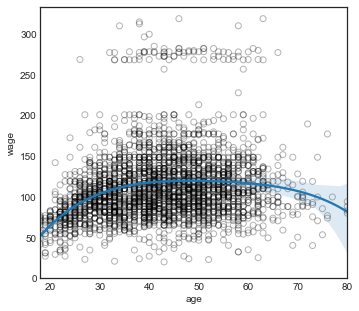

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
ax.scatter(df_wage.age, df_wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(df_wage.age, df_wage.wage, order=4, truncate=True, scatter=False, ax=ax, ci=100)
ax.set_ylim(ymin=0);

#### Plotting polynomial regression curve by training the model by yourself

In [5]:
# Generate a matrix of powers of age data less than or equal to nth degree.
X_wage = PolynomialFeatures(4).fit_transform(df_wage.age.values.reshape(-1, 1))
print('X:\n', X_wage[:5])

# Regression
fit1 = LinearRegression()
fit1.fit(X_wage, df_wage.wage)

age_grid_wage = np.arange(df_wage.age.min(), df_wage.age.max()).reshape(-1, 1)
X_grid = PolynomialFeatures(4).fit_transform(age_grid_wage)

# Polynomial regression for data
pred1 = fit1.predict(X_grid)

X:
 [[1.000000e+00 1.800000e+01 3.240000e+02 5.832000e+03 1.049760e+05]
 [1.000000e+00 2.400000e+01 5.760000e+02 1.382400e+04 3.317760e+05]
 [1.000000e+00 4.500000e+01 2.025000e+03 9.112500e+04 4.100625e+06]
 [1.000000e+00 4.300000e+01 1.849000e+03 7.950700e+04 3.418801e+06]
 [1.000000e+00 5.000000e+01 2.500000e+03 1.250000e+05 6.250000e+06]]


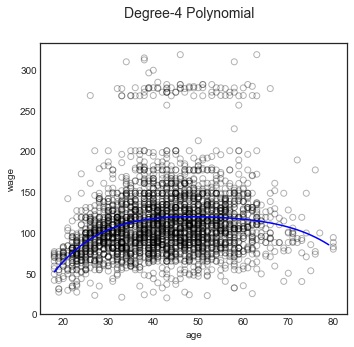

In [6]:
# creating plots
fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line
ax.scatter(df_wage.age, df_wage.wage, facecolor='None', edgecolor='k', alpha=0.3)

ax.set_ylim(ymin=0)
ax.set_xlabel('age')
ax.set_ylabel('wage')

'''
TODO: Write a one line of code to draw the regression line by yourself.
'''
pass

ax.plot(age_grid_wage, pred1, color='b')

#### Exercise: Draw a logistic regression curve of the image below. [3min]
* Use income as the x-axis and limit as the y-axis of credit dataset.
* Plot 4-degree polynomial regression curve

<img src='../Images/7-6.png' />

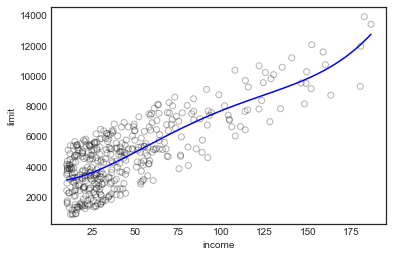

In [7]:
# TODO



### Figure 7.1.right - Logistic Regression

<img src="../Images/7-1.png">

In [8]:
# Assign binaries on whether the wage is larger than 250 or not to y.
wage_prob = (df_wage.wage > 250).map({False:0, True:1}).values
Counter(wage_prob)

Counter({0: 2921, 1: 79})

#### Exercise: Draw the logistic regression line of Figure 7.1.right on ```ax```. [3 min]

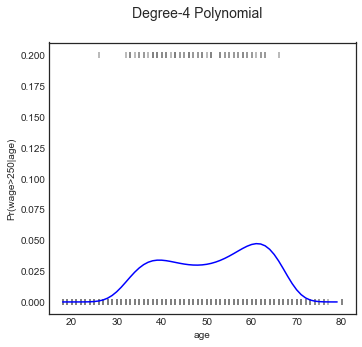

In [9]:
### creating plots
fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)

# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax.scatter(df_wage.age, wage_prob / 5, c='grey', marker='|', alpha=0.7)

ax.set_ylim(-0.01, 0.21)
ax.set_xlabel('age')
ax.set_ylabel('Pr(wage>250|age)')

'''
TODO
'''
pass



#### Exercise: Draw the logistic regression line of the image below with the credit dataset. [5 min]
* Use income as the x-axis and limit as the y-axis of credit dataset.
* Plot 4-degree polynomial regression curve

<img src='../Images/7-7.png' />

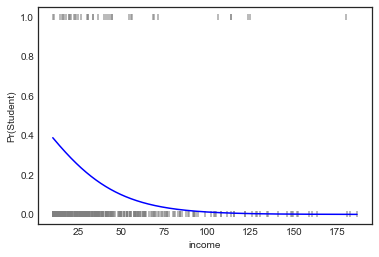

In [10]:
# TODO



### Polynomial Regression with Multiple Degrees

<img src="../images/7-2.png">

#### Exercise: Plot data and the regression curves of the above image on the figure below. [5 min]

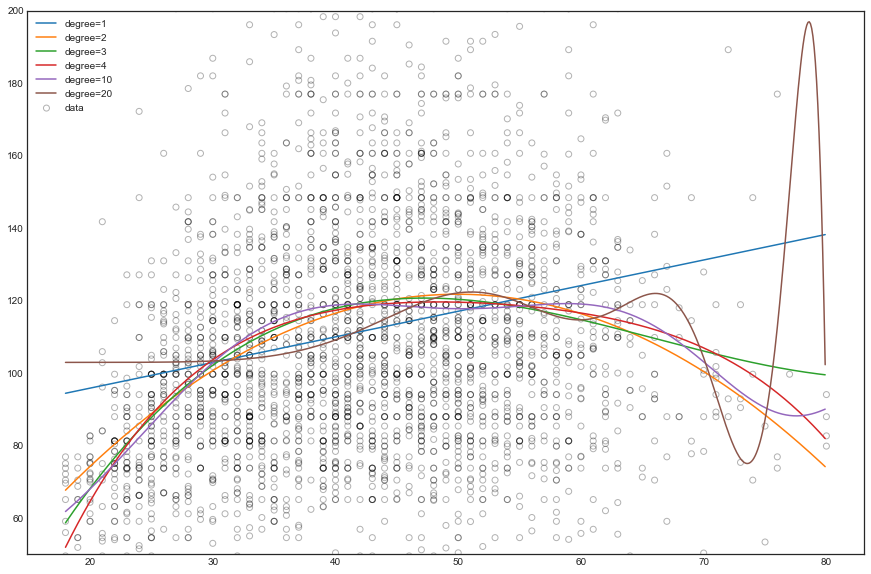

In [11]:
def PolynomialRegression(degree=None):
    return Pipeline([
        ('Polynomial Features', PolynomialFeatures(degree)),
        ('Linear Regression', LinearRegression()),
    ])

age = np.array(df_wage.age).reshape(-1, 1)
wage = np.array(df_wage.wage).reshape(-1, 1)

plt.figure(figsize=(15, 10))
plt.ylim(50, 200)

# TODO: Draw data with the following parameters: {label: 'data', facecolor: 'none', edgecolor: 'k', alpha: 0.3}


for degree in [1, 2, 3, 4, 10, 20]:
    pass
    # TODO: Create a model instance.
    
    
    # TODO: Train the model.
    
    
    # TODO: Create a grid. range: min(age) ~ max(age), interval: 0.1
    
    
    # TODO: Run the model to predict values.
    
    
    # TODO: Plot the predicted values.
    

plt.legend()

### Finding the best degree for polynomial regression

Generating a random data with the polynomial degree 5

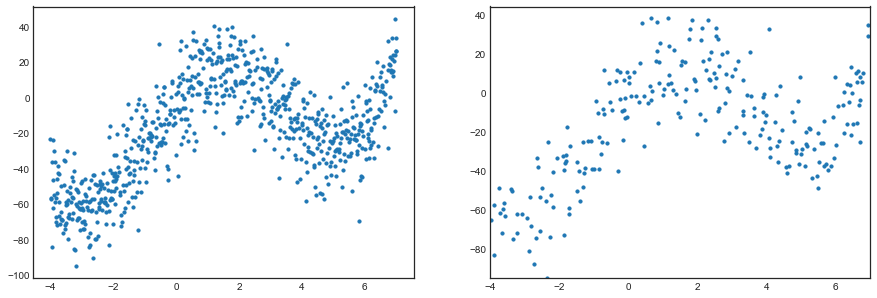

In [12]:
from sklearn.model_selection import train_test_split

np.random.seed(1)
X = np.linspace(-4, 7, 1000)
y = 20 * X - 5 * X ** 2 - 1 * X ** 3 + 0.2 * X ** 4 + np.random.normal(-3, 15, X.shape[0])
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(X_train, y_train, s=10)
ax2.scatter(X_test, y_test, s=10)
ax2.set_xlim(ax1.xaxis.get_data_interval())
ax2.set_ylim(ax1.yaxis.get_data_interval());

<img src="../Images/7-3.png">

#### Exercise: Draw the data and the  regression curves of the image above (10 min)

Use ```X_train``` and ```y_train``` for the regression.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

plt.figure(figsize=(15, 10))

# TODO



#### Finding the best loss

<img src="../Images/7-4.png">

#### Exercise: Let's draw the graph above. (Step 1 ~ Step 3) [10 min]

#### Exercise: Step 1: Run grid search.

* Use ```GridSearchCV``` with ```PolynomialRegression```.
* Pass ```{'Polynomial Features__degree': degrees}``` to ```GridSearchCV``` as a parameter.
* Use ```'neg_mean_squared_error'``` for the scoring method.
* You also need to pass ```True``` as a ```return_train_score``` parameter.

In [14]:
# TODO: Create and train GridSearchCV



GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Polynomial Features',
                                        PolynomialFeatures(degree=None)),
                                       ('Linear Regression',
                                        LinearRegression())]),
             param_grid={'Polynomial Features__degree': [3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

#### Exercise: Step 2: Get train errors, cross validation errors, and test errors.
* Get ```mean_train_score``` and ```mean_test_scores``` from the grid search results and save them to ```train_errors``` and ```cv_errors``` each. 
* For each degree, train ```PolynomialRegression``` model and get the test error with ```mean_squared_error``` function.

Expected results:
```
train errors:
 [404.20148672 211.42155277 211.30929552 210.31065383 210.18580973
 209.80031717 209.64626533 209.56266022 209.49534568 209.45829024
 208.48010635 208.41604743 208.17294562 207.67520733 207.64713169
 208.01794533 234.86204296 297.57167828]
cross validation errors:
 [410.39117682 214.41878765 214.73994789 214.16564731 214.80338374
 214.72089807 215.21375818 215.71341739 216.88527328 217.48323156
 217.50925242 218.42293649 218.97159198 219.72289043 220.35691943
 221.4769376  247.91797233 310.54136658]
test errors:
 [385.2064310638469, 231.2424872332404, 231.72726361996826, 232.57026792234126, 232.90170248958216, 233.74996173924634, 233.48748282285592, 233.8296710813144, 233.90235989490196, 233.87973463695053, 238.34099360225403, 237.90025676602852, 239.05554924081645, 239.82257373360113, 239.8775724666281, 239.41852923646516, 257.99780403209155, 314.4648164464844]
```

In [15]:
# TODO

train_errors = []
cv_errors = []
test_errors = []

print('train errors:\n', train_errors)
print('cross validation errors:\n', cv_errors)
print('test errors:\n', test_errors)

train errors:
 [404.20148672 211.42155277 211.30929552 210.31065383 210.18580973
 209.80031717 209.64626533 209.56266022 209.49534568 209.45829024
 208.48010635 208.41604743 208.17294562 207.67520733 207.64713169
 208.01794533 234.86204296 297.57167828]
cross validation errors:
 [410.39117682 214.41878765 214.73994789 214.16564731 214.80338374
 214.72089807 215.21375818 215.71341739 216.88527328 217.48323156
 217.50925242 218.42293649 218.97159198 219.72289043 220.35691943
 221.4769376  247.91797233 310.54136658]
test errors:
 [385.2064310638469, 231.2424872332404, 231.72726361996826, 232.57026792234126, 232.90170248958216, 233.74996173924634, 233.48748282285592, 233.8296710813144, 233.90235989490196, 233.87973463695053, 238.34099360225403, 237.90025676602852, 239.05554924081645, 239.82257373360113, 239.8775724666281, 239.41852923646516, 257.99780403209155, 314.4648164464844]


#### Exercise: Step 3: Draw the graph above.

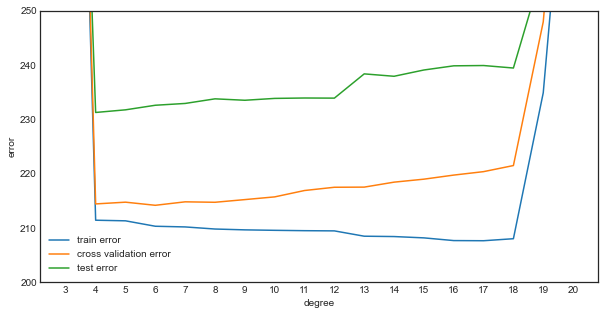

In [16]:
plt.figure(figsize=(10, 5))
plt.ylim(200, 250)

# TODO


#### Print the best parameter

In [17]:
print('Best Parameter (cross-validation): {}'.format(reg.best_params_))

Best Parameter (cross-validation): {'Polynomial Features__degree': 6}


---
## 7.2 Step Function

### Figure 7.2

<img src='../Images/7-5.png'/>

In [18]:
df_wage_cut, bins = pd.cut(df_wage.age, 4, retbins=True, right=True)
bins

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [19]:
df_wage_cut

0       (17.938, 33.5]
1       (17.938, 33.5]
2         (33.5, 49.0]
3         (33.5, 49.0]
4         (49.0, 64.5]
             ...      
2995      (33.5, 49.0]
2996    (17.938, 33.5]
2997    (17.938, 33.5]
2998    (17.938, 33.5]
2999      (49.0, 64.5]
Name: age, Length: 3000, dtype: category
Categories (4, interval[float64]): [(17.938, 33.5] < (33.5, 49.0] < (49.0, 64.5] < (64.5, 80.0]]

In [20]:
df_wage_steps = pd.concat([df_wage.age, df_wage_cut, df_wage.wage], keys=['age','age_cuts','wage'], axis=1)
df_wage_steps.head(5)

age        age_cuts        wage
0   18  (17.938, 33.5]   75.043154
1   24  (17.938, 33.5]   70.476020
2   45    (33.5, 49.0]  130.982177
3   43    (33.5, 49.0]  154.685293
4   50    (49.0, 64.5]   75.043154

In [21]:
# Create dummy variables for the age groups
df_wage_steps_dummies = pd.get_dummies(df_wage_steps['age_cuts'])

df_wage_steps_dummies.head(5)

(17.938, 33.5]  (33.5, 49.0]  (49.0, 64.5]  (64.5, 80.0]
0               1             0             0             0
1               1             0             0             0
2               0             1             0             0
3               0             1             0             0
4               0             0             1             0

In [22]:
# Regression
fit3 = LinearRegression()
fit3.fit(df_wage_steps_dummies, df_wage_steps.wage)

# Logistic Regression

fit4 = Logit(wage_prob, df_wage_steps_dummies).fit()

Optimization terminated successfully.
         Current function value: 0.118282
         Iterations 9


In [23]:
# Put the test data in the same bins as the training data.
bin_mapping = np.digitize(age_grid_wage.ravel(), bins)
bin_mapping

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [24]:
# Get dummies, drop first dummy category, add constant
X_test = pd.get_dummies(bin_mapping)
X_test.head()

1  2  3  4
0  1  0  0  0
1  1  0  0  0
2  1  0  0  0
3  1  0  0  0
4  1  0  0  0

In [25]:
age_grid_wage.shape

(620, 1)

In [26]:
X_test.shape

(620, 4)

In [27]:
# Linear Regression
pred3 = fit3.predict(X_test)

# Logistic Regression
pred4 = fit4.predict(X_test)

In [28]:
# creating plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(df_wage.age, df_wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(age_grid_wage, pred3, c='b')
ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin=0)

ax2.plot(age_grid_wage, pred4, color='b')
ax2.scatter(df_wage.age, wage_prob / 5, s=30, c='grey', marker='|', alpha=0.7)
ax2.set_ylim(-0.01, 0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');

#### Exercise: Step function [5 min]
* Draw step function graph with credit dataset.
* Use income as the x-axis and limit as the y-axis.

<img src='../Images/7-8.png' />

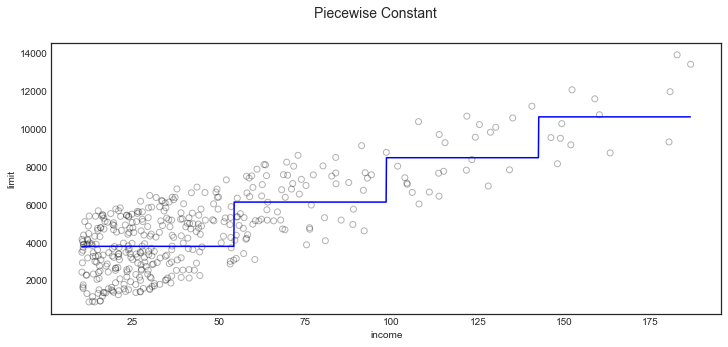

In [29]:
# TODO



## 7.3 Splines

### Cubic splines with the specified number of knots

In [30]:
transformed_x = dmatrix("bs(df_wage.age, knots=(25,40,60), degree=3, include_intercept=False)",
                        {"df_wage.age": df_wage.age}, return_type='dataframe')
transformed_x.head()

Intercept  \
0        1.0   
1        1.0   
2        1.0   
3        1.0   
4        1.0   

   bs(df_wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]  \
0                                           0.000000                           
1                                           0.559911                           
2                                           0.000000                           
3                                           0.000000                           
4                                           0.000000                           

   bs(df_wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]  \
0                                           0.000000                           
1                                           0.403778                           
2                                           0.114796                           
3                                           0.167109                           
4                                           0.034014                           

   bs(df_wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]  \
0                                           0.000000                           
1                                           0.033395                           
2                                           0.618564                           
3                                           0.633167                           
4                                           0.508194                           

   bs(df_wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]  \
0                                           0.000000                           
1                                           0.000000                           
2                                           0.262733                           
3                                           0.198880                           
4                                           0.426542                           

   bs(df_wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]  \
0                                           0.000000                           
1                                           0.000000                           
2                                           0.003906                           
3                                           0.000844                           
4                                           0.031250                           

   bs(df_wage.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]  
0                                                0.0                          
1                                                0.0                          
2                                                0.0                          
3                                                0.0                          
4                                                0.0

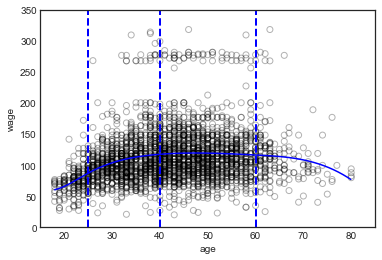

In [31]:
fit5 = LinearRegression().fit(transformed_x, df_wage.wage)
pred5 = fit5.predict(dmatrix("bs(age_grid_wage, knots=(25,40,60), degree=3, include_intercept=False)",
                             {"age_grid_wage": age_grid_wage}, return_type='dataframe'))

plt.scatter(df_wage.age, df_wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(age_grid_wage, pred5, color='b')

for i in [25,40,60]:
    plt.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='b')

plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage');

### Cubic splines with the specified degree of freedom

In [32]:
transformed_x2 = dmatrix("bs(df_wage.age, df=6, degree=3, include_intercept=False)",
                        {"df.age": df_wage.age}, return_type='dataframe')
transformed_x2.head()

Intercept  bs(df_wage.age, df=6, degree=3, include_intercept=False)[0]  \
0        1.0                                           0.000000             
1        1.0                                           0.537145             
2        1.0                                           0.000000             
3        1.0                                           0.000000             
4        1.0                                           0.000000             

   bs(df_wage.age, df=6, degree=3, include_intercept=False)[1]  \
0                                           0.000000             
1                                           0.208308             
2                                           0.042161             
3                                           0.099937             
4                                           0.000195             

   bs(df_wage.age, df=6, degree=3, include_intercept=False)[2]  \
0                                           0.000000             
1                                           0.017316             
2                                           0.751086             
3                                           0.780172             
4                                           0.529332             

   bs(df_wage.age, df=6, degree=3, include_intercept=False)[3]  \
0                                           0.000000             
1                                           0.000000             
2                                           0.204676             
3                                           0.119815             
4                                           0.431076             

   bs(df_wage.age, df=6, degree=3, include_intercept=False)[4]  \
0                                           0.000000             
1                                           0.000000             
2                                           0.002078             
3                                           0.000077             
4                                           0.039397             

   bs(df_wage.age, df=6, degree=3, include_intercept=False)[5]  
0                                                0.0            
1                                                0.0            
2                                                0.0            
3                                                0.0            
4                                                0.0

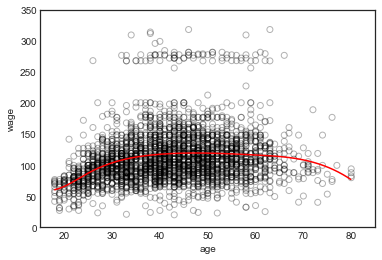

In [33]:
fit6 = LinearRegression().fit(transformed_x2, df_wage.wage)
pred6 = fit6.predict(dmatrix("bs(age_grid_wage, df=6, degree=3, include_intercept=False)",
                             {"age_grid_wage": age_grid_wage}, return_type='dataframe'))
plt.scatter(df_wage.age, df_wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(age_grid_wage, pred5, c='r')

plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage');

### Natural splines with the specified degree of freedom

In [34]:
transformed_x3 = dmatrix("cr(df_wage.age, df=4)", {"df_wage.age": df_wage.age}, return_type='dataframe')
transformed_x3.head()

Intercept  cr(df_wage.age, df=4)[0]  cr(df_wage.age, df=4)[1]  \
0        1.0                  1.000000                  0.000000   
1        1.0                  0.627430                  0.462418   
2        1.0                 -0.080345                  0.756695   
3        1.0                 -0.072389                  0.856210   
4        1.0                 -0.065013                  0.454076   

   cr(df_wage.age, df=4)[2]  cr(df_wage.age, df=4)[3]  
0                  0.000000                  0.000000  
1                 -0.105556                  0.015708  
2                  0.372737                 -0.049087  
3                  0.251241                 -0.035062  
4                  0.679982                 -0.069045

In [35]:
fit7 = LinearRegression().fit(transformed_x3, df_wage.wage)
pred7 = fit7.predict(dmatrix("cr(age_grid_wage, df=4)", {"age_grid_wage": age_grid_wage}, return_type='dataframe'))
plt.scatter(df_wage.age, df_wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(age_grid_wage, pred7, c='g')
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage');

### Plot altogether

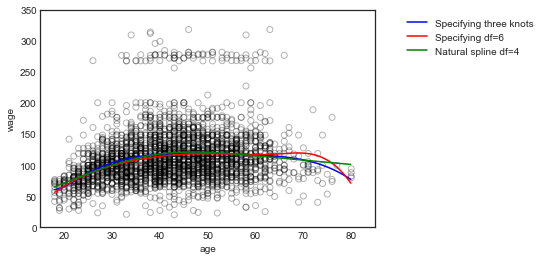

In [36]:
plt.scatter(df_wage.age, df_wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(age_grid_wage, pred5, color='b', label='Specifying three knots')
plt.plot(age_grid_wage, pred6, color='r', label='Specifying df=6')
plt.plot(age_grid_wage, pred7, color='g', label='Natural spline df=4')
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage');